In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_load = nib.load(r'C:\Users\aleja\Desktop\TFG\Muestreo\data\mri_norm2.h5_img.nii.gz').get_fdata()
img_load.shape

(232, 144, 88)

In [3]:
gt_load = nib.load(r'C:\Users\aleja\Desktop\TFG\Muestreo\data\mri_norm2.h5_gt.nii.gz').get_fdata()
gt_load.shape

(232, 144, 88)

In [4]:
pred_load = nib.load(r'C:\Users\aleja\Desktop\TFG\Muestreo\data\mri_norm2.h5_pred.nii.gz').get_fdata()
pred_load.shape

(232, 144, 88)

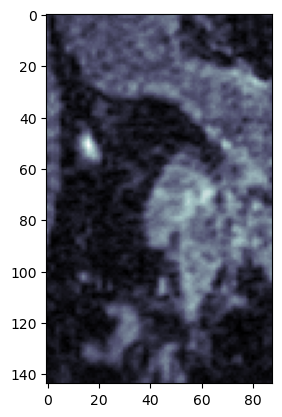

In [5]:
test_img = img_load[52]
plt.imshow(test_img, cmap='bone')
plt.show()

Nombre del archivo: mri_norm2.h5_gt.nii.gz
Forma de la imagen: (232, 144, 88)


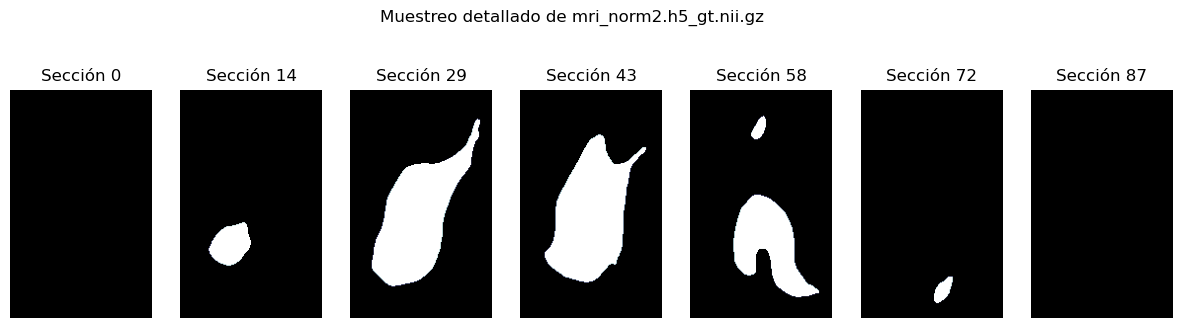

Nombre del archivo: mri_norm2.h5_img.nii.gz
Forma de la imagen: (232, 144, 88)


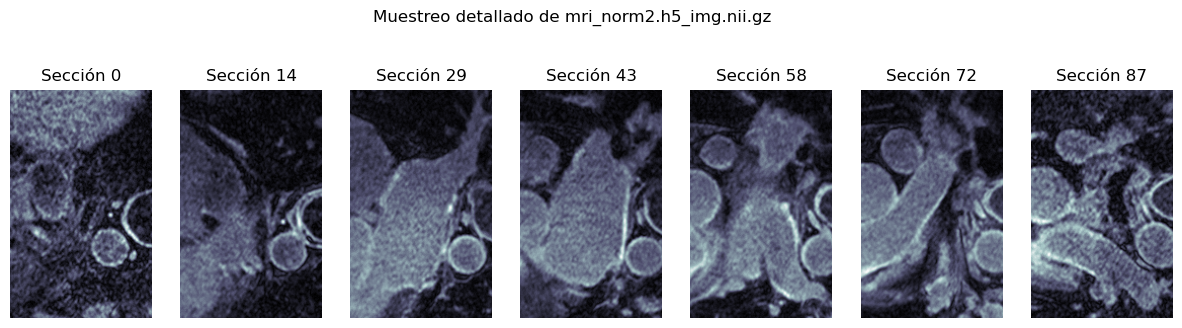

Nombre del archivo: mri_norm2.h5_pred.nii.gz
Forma de la imagen: (232, 144, 88)


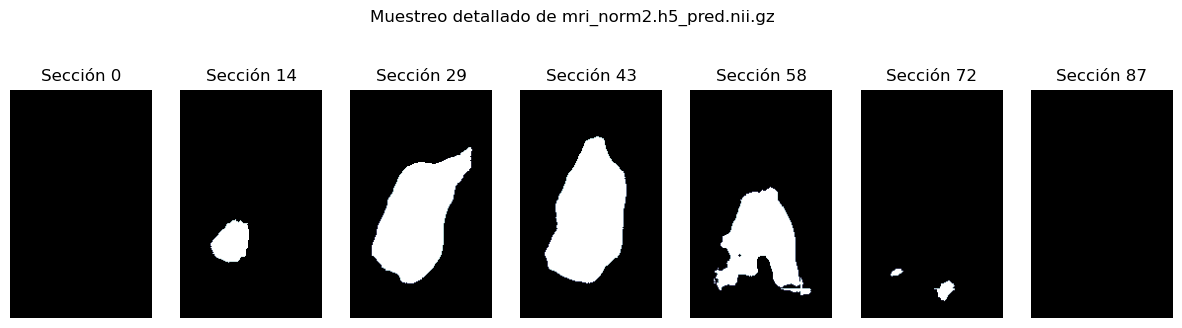

In [6]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Ruta al directorio que contiene las imágenes .nii.gz
data_dir = r'C:\Users\aleja\Desktop\TFG\Muestreo\data'

# Listar todos los archivos .nii.gz en el directorio
files = [f for f in os.listdir(data_dir) if f.endswith('.nii.gz')]

# Iterar sobre cada archivo .nii.gz
for file in files:
    # Cargar la imagen .nii.gz
    img_path = os.path.join(data_dir, file)
    img = nib.load(img_path)
    
    # Obtener los datos de la imagen
    img_data = img.get_fdata()
    
    # Obtener información de la forma y el tamaño de la imagen
    shape = img_data.shape
    print(f"Nombre del archivo: {file}")
    print(f"Forma de la imagen: {shape}")
    
    num_sections = 7
    section_indices = np.linspace(0, shape[2] - 1, num_sections, dtype=int)
    
    plt.figure(figsize=(15, 4))
        
    for i, idx in enumerate(section_indices):
        section_img = img_data[:, :, idx]
        
        # Visualizar la sección de la imagen
        plt.subplot(1, num_sections, i + 1)
        plt.imshow(section_img, cmap='bone')
        plt.title(f"Sección {idx}")
        plt.axis('off')
        
          
    plt.suptitle(f"Muestreo detallado de {file}")
    plt.show()      
    

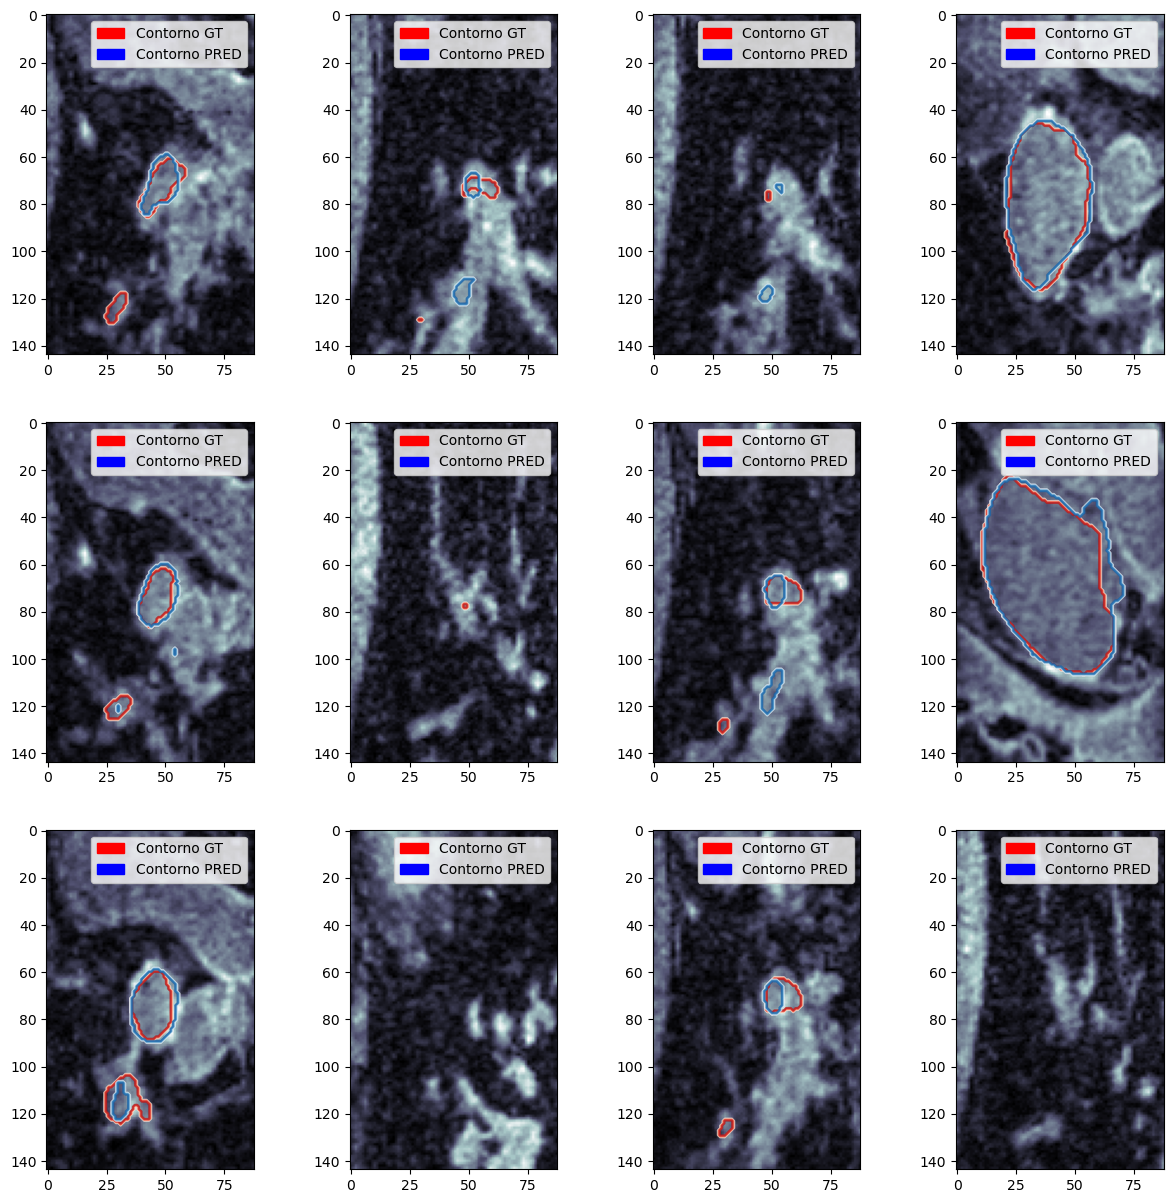

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_contorno(num):
    j   = 0
    i   = 0
    row = len(num)/4

    fig, axs = plt.subplots(int(row), 4, figsize=(15, 15))
    
    # Configurar Leyenda
    red_patch  = mpatches.Patch(color='red', label='Contorno GT')
    blue_patch = mpatches.Patch(color='blue', label='Contorno PRED')
    
    for image in num:

        image1 = gt_load[image]   # Imagen 1
        image2 = img_load[image]  # Imagen 2
        image3 = pred_load[image] # Imagen 3

        # Superponer las imágenes en una sola trama         
        axs[i][j].contour(image1, cmap='Reds', alpha=0.5)
        axs[i][j].imshow(image2, cmap='bone')
        axs[i][j].contour(image3, cmap='Blues', alpha=0.5)  
        
        # Meter leyenda
        axs[i][j].legend(handles=[red_patch, blue_patch])
        
        
        if (j<3):
            j+=1
            
        else:
            j=0
            i+=1     
    
    plt.show()
        

# Plotea nº imagenes multiplo de 4
array_imagenes = [50, 30, 25, 90, 56, 17, 35, 150,66,231,39,14]
plot_contorno(array_imagenes)

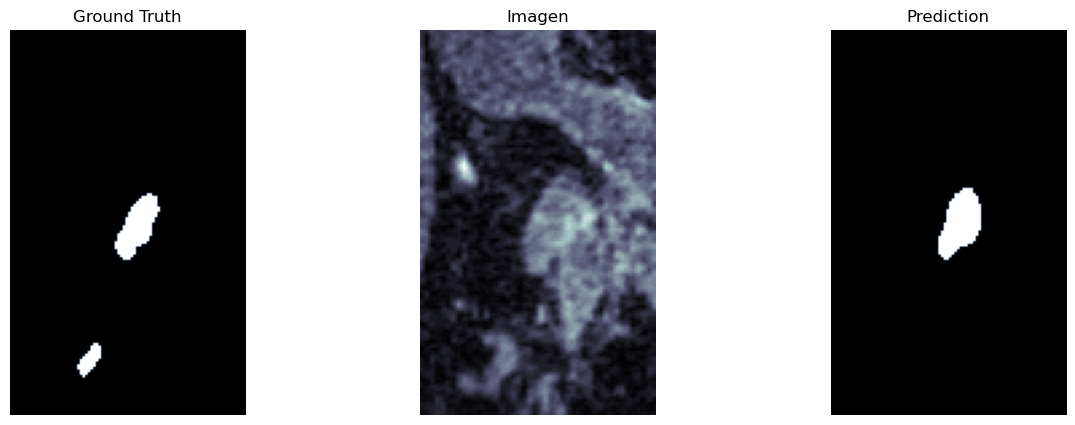

In [10]:
# Crear una nueva figura
plt.figure(figsize=(15, 5))  # Tamaño de la figura

image1 = gt_load[52]
image2 = img_load[52]
image3 = pred_load[52]

# Sub-trama 1
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='bone')
plt.title('Ground Truth')
plt.axis('off')

# Sub-trama 2
plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='bone')
plt.title('Imagen')
plt.axis('off')

# Sub-trama 3
plt.subplot(1, 3, 3)
plt.imshow(image3, cmap='bone')
plt.title('Prediction')
plt.axis('off')

# Mostrar la trama resultante
plt.show()

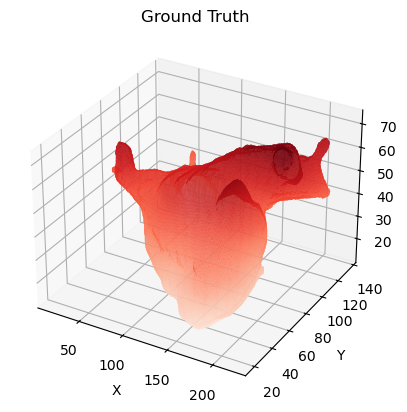

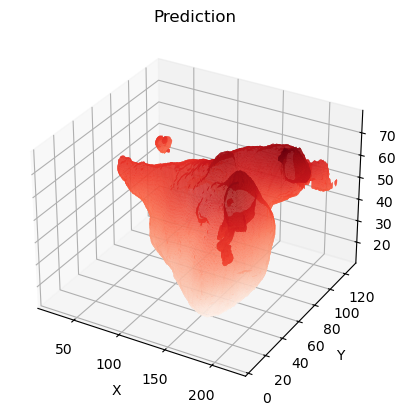

In [13]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import skimage


def plot_3D(path, titulo):

    # Cargar la imagen .nii
    img = nib.load(path)
    img_data = img.get_fdata()

    # Obtener la superficie del objeto
    verts, faces, _, _ = skimage.measure.marching_cubes(img_data)

    # Crear una nueva figura
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot de la superficie del objeto
    ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], cmap='Reds', linewidth=1, antialiased=True)

    # Configuración de los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(titulo)

    # Mostrar el gráfico
    plt.show()
    

plot_3D(r'C:\Users\aleja\Desktop\TFG\Muestreo\data\mri_norm2.h5_gt.nii.gz', "Ground Truth")
plot_3D(r'C:\Users\aleja\Desktop\TFG\Muestreo\data\mri_norm2.h5_pred.nii.gz', "Prediction")